<a href="https://colab.research.google.com/github/nbche/AIFFEL_quest_cr/blob/main/Datathon_3%EC%A1%B0_%EC%BD%94%EC%96%B411%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1. 데이터 준비/선정**

*   지역: 방콕 (태국)

*   선택 목적: 아시아의 대표적 관광 국가이며 타 아시아 국가 (일본 동경과 중국 홍콩) 대비 상대적으로 데이터량이 큼. (Step 1-2 참조)

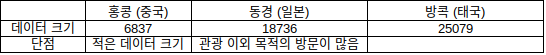

*   자료원: https://insideairbnb.com/get-the-data/


----------------------------------------------------------------------------------------------------------------------------------------------------------------

**Step 2. 데이터 세트**

총 4종의 정보가 제공됨

- listing_gz: 제공 숙소와 관련된 모든 공개 정보 총 75개 특성
- neighourhoods:방콕의 50개 권역 이름 (그 외 정보 없음)
- calendar_gz:기준 일자부터 향후 1년간의 숙소 가용성 (예약율)
- review_gz:숙소에 매겨진 이용자들의 리뷰 내용 전체 (2021년부터 2024년까지)

2번째 neighbourhoods 의 경우, 세부 지역 정보가 listing 에 이미 반영되어 있어 굳이 사용할 필요 없음.

3번째 예약율의 경우, 집객 성과를 평가할 수 있는 척도로 유용하기는 하지만, 전체 데이터 (25,079 숙소) 중 11,4% 에 상응하는 2.875 숙소만 정보가 제공되어 분석 자료로 사용하기에 한계가 있음

4번째 리뷰의 경우, 본 프로젝트의 목적 달성에 직접 연관이 되지 않아서 분석의 대상에서 제외함

결론적으로 **listing 에 적혀진 속성들을** 가격예측 모형에 사용하기로 결론 내림

----------------------------------------------------------------------------------------------------------------------------------------------------------------

**Step 3. 데이터빵 프로젝트**

*   목표: 본 프로젝트는 Air B&B 의 숙소 관련 자료를 분석하여, 이를 바탕으로 숙소 가격 예측 모델을 만드는 것을 목표로 둠

*   목적: 가격 예측 모델을 통해 방콕에서 Air B&B 를 개시하려는 시장 참여자 (숙소 제공자)에게 최초 숙소 가격을 제시해 주려는 것이 목적임

*   가정:

    1) **최초** 숙소 가격에 영향을 미치는 요소는 숙소와 관련한 제반 사항들임

    2) 숙소 제공자 (host) 의 사업 역량과 고객의 리뷰는 숙소의 예약율 (즉, 숙소 접객의 성공) 에 영향을 끼침

    3) 숙소의 유명도가 향후 가격 변동에 영향을 끼칠 수 있지만, 최초 가격 형성과는 무관함



----------------------------------------------------------------------------------------------------------------------------------------------------------------

**Step 4. 변수 분석**

*   Listings 는 가격 포함 총 75개의 변수로 구성됨

*   변수의 성격으로 구분을 하면, 총 6개로 그룹화 가능:  일반, 시설 제공자 (host), 지역, 숙소 타입, 세부 시설, 리뷰

*   최초 가격 예측이라는 분석 목적에 적합한 그룹으로 **지역 (5개 변수), 숙소타입 (3개 변수), 세부시설 (5개) ** 을 선정함


    1) 지역 변수 분석 결과
- neighbourhood_overview 와 neighbourhood 의 높은 결측치에 대한 고민 (정보의 유무가 가격에 미치는 영향 살펴보이야 함)
- neighbourhood_cleansed 은 방콕 50개 지역을 의미하며 결측치가 없어 지역 변수로 채택
    https://en.wikipedia.org/wiki/List_of_districts_of_Bangkok
- neighbourhood_group_cleansed 변수의 무용성
- latitide 와 longitude 위치 정보를 이용하여 주요 관광지와 숙소들의 거리 변수를 생성하여, 이를 FE 단계에서 활용코저 함


    2) 숙소 타입 분석 결과
- 숙소 유형보다는 룸타입을 데이터에 사용


    3) 세부 시설 분석 결과
- 방의 갯수를 숙소 사이즈를 가늠하는 척도로 함. 침대 갯수가 동일한 역할을 하지 못함
- 편의 시설 (Amenities) 를 숙소 가격 결정에 주요 변수로 인지함

----------------------------------------------------------------------------------------------------------------------------------------------------------------

**Step 5. Feature Engineering**

    1) 거리 변수
    : 해당 숙소와 방콕 10대 명소간의 거리를 계산함
    : 거리가 짧을 수로 숙소 가격이 올라간다 가정함
    : 10대 관광지는 Tripadvisor 사이트의 순위를 이용함
      https://www.tripadvisor.com/Attractions-g293916-Activities-a_allAttractions.true-Bangkok.html
    : 선택된 리스트는 아래와 같음
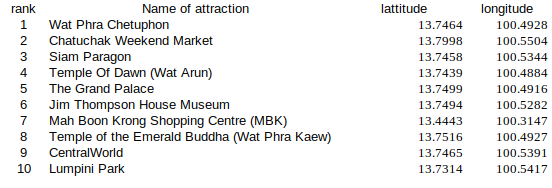
    
    : 거리 계산은 geopy.distance 모듈의 geodesic 함수를 사용함

    2) amienities 변수
    : 항목을 확인하여 상위 100위만 선정
    : 기본이 되는 항목은 제외하고 인기 항목을 선정하여 추가
    : 인기 항목은 airbnb에서 가장 많이 검색된 항목을 기준으로 함
    https://www.airbnb.co.kr/resources/hosting-homes/a/the-amenities-guests-want-25

**Step 6. 변수 전처리**

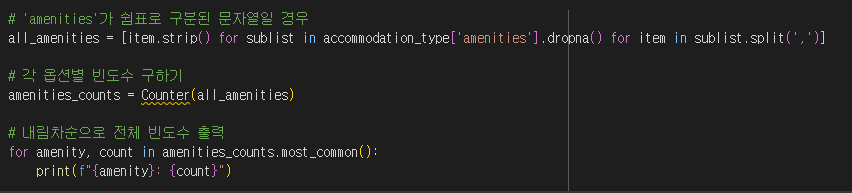

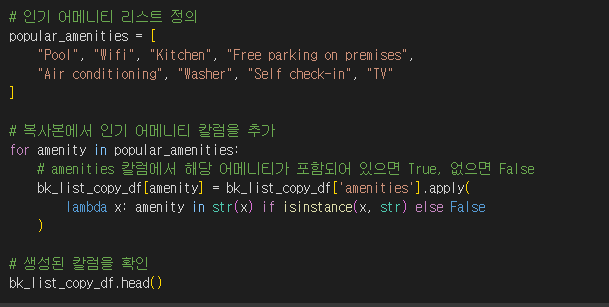

1. 관심 열 선택

  *   학습시키고자 하는 컬럼을 제외한 모든 컬럼 삭제
2. price 열 정리 및 이상치 제거

  *   특수 문자 제거 및 숫자로 변환
  *   과도하게 낮은 가격과 높은 가격을 제외한 1% ~ 99% 범위를 사용
3. bedrooms 열과 amenities 열 정리

  *   침실의 수가 10개를 넘는 데이터는 적고 이상치가 될 우려가 있어 0.0 ~ 10.0 사이 값을 유지
  *   amenities 열은 문자열로 구성되어 있고, 각각의 어메니티가 가진 희소성을 판별하기 어렵기 때문에 어메니티의 개수로 판단하기 위해 변환
4. 원-핫 인코딩

  *   neighbourhood_cleansed와 room_type 컬럼은 문자열로 구성되어 있기 때문에 원-핫 인코딩 실행
5. 결측값 처리

  *   price 컬럼에 존재하는 결측치 제거


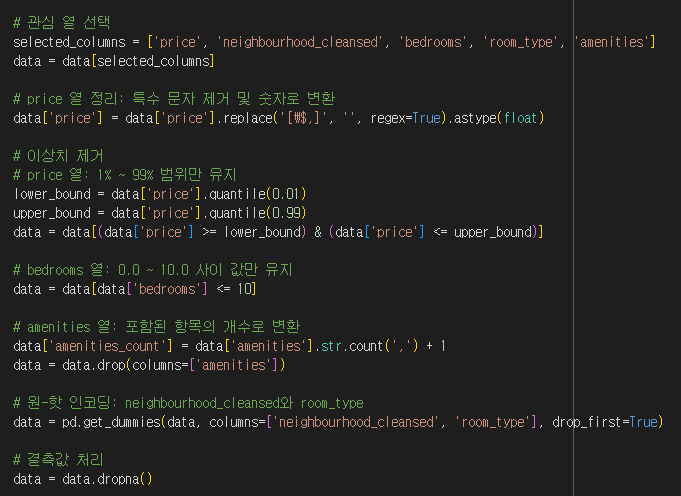

----------------------------------------------------------------------------------------------------------------------------------------------------------------

**Step 7. 가격 예측 모델 (Base model)**

- 변수끼리의 상관 관계 분석

- Feature : 지역 (neighbourhood), 시설 (room-type), 규모 (bedrooms), 세부시설 (Amenities 의 개수)
- Target : 가격 (결측치 제거한 경우*)

- 스케일링: Standard Scaling, Robust Sacaling, Min-max Scaling **
- 사용 모듈 : Scikit learn  Regression
- 데이터 프레임 사이즈: 19.653*54

   * 가격 예측 모델을 구현을 위해 결측값을 대체값으로 채우는 것이 모델의 설명력에 부정적으로 영향을 미칠 것으로 간주되어 결측치를 제거하는 방식으로 감
   ** 3개의 방식 모두 사용하였고, 결과값이 대등소이하여 Min-max Scailing 으로 진행함

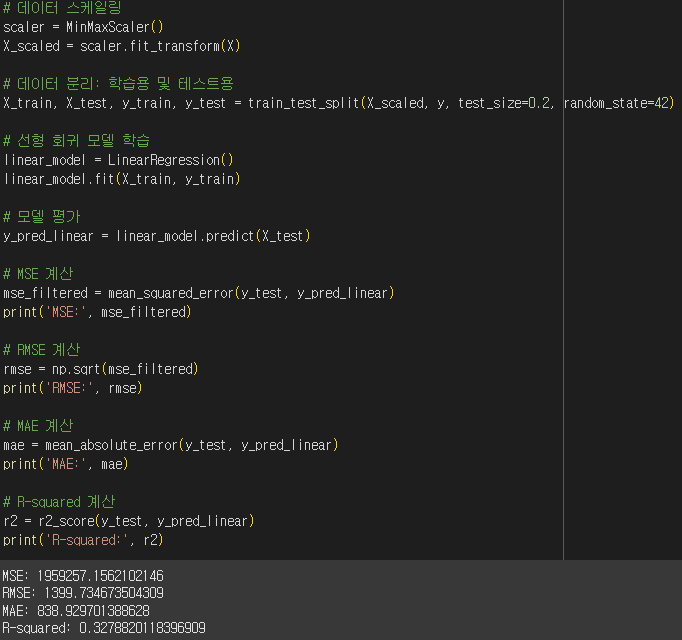

----------------------------------------------------------------------------------------------------------------------------------------------------------------

**Step 8. 가격 예측 모델 (Feature engineered model)**

 - Features 추가 변수: 거리 변수 추가 +  세부시설을 수량이 아닌 중요 세부시설로 변수화 처리
 - 데이터 프레임 사이즈: 19.653*62

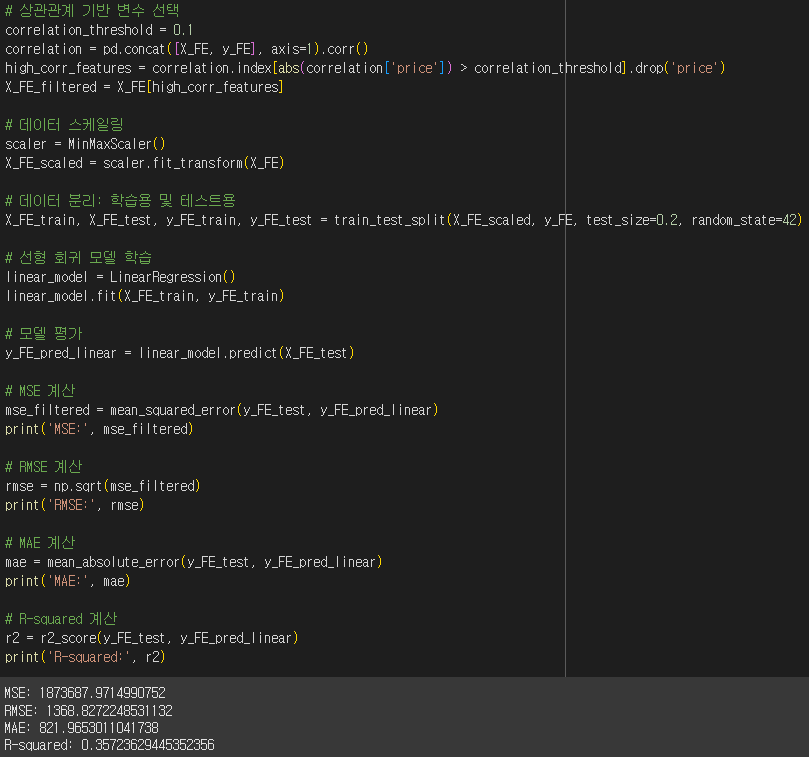

----------------------------------------------------------------------------------------------------------------------------------------------------------------

**Step 9. 결과 분석**

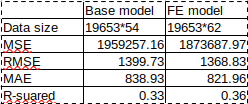

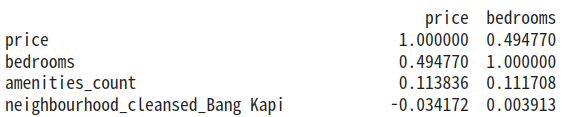

- Feature Engineering 을 통해 추가한 변수가 모델의 설명력을 3% 올려줌
- Base 와 FE 모델 모두 성공적인 가격 예측 모델이라 하기에는 R squared 값이 40% 미만이라 몹시 낮음
- 주요 변수들간의 상관 관계를 없는 것으로 판단되어, 변수 사이에서 발생하는 이슈로는 보이지 않음

- 모델의 한계
Target 변수가 각 숙소의 최초 가격이 아닌 기준 시점의 가격이라는 점. 즉, 해당 숙소의 유명도가 반영되어 있다는 점

----------------------------------------------------------------------------------------------------------------------------------------------------------------

**회고**

*   채남병 :
 - 실제 데이터를 이용하여 분석 및 모델링까지 실행해 보았다는 점에서 전체 여정이 의미가 있었습니다.
 - 모델의 설명력이 낮은 부분에서 주어진 자료 이외에서 숙소 가격을 결정하는 요인이 있음으로 간주하여 가격 예측 자체의 어려움을 실감하는 계기가 되었습니다.
 - 또한 저의 리더십 스타일을 돌아보는 시간이기도 했습니다.

*   이지선
 - 문제 정의를 어떻게 하느냐에 따라 많은 부분이 달라진다는걸 알게 되었습니다. 모든 자료를 사용하지 않고 목표에 맞춰 선택할 수 있는 자료들이 한정적이라는걸 느꼈습니다.
 - 소통이 큰 부분을 차지한다고 느껴졌습니다. 목표를 잡는 부분이나 데이터리뷰에서 약간의 소통오류를 겪기도 했지만 서로 잘 해낸거 같습니다.

*   강민성

  *   자료가 방대하다 보니 어떠한 방향으로 목표를 설정해야할지 어려웠지만, 팀원 분들과의 소통으로 해결했습니다.
  *   열심히 베이스 모델을 만들고 학습 시킨 후에 더 열심히 피쳐 엔지니어링을 진행했는데, r2스코어가 0.03밖에 오르지 않아서 조금 충격을 받았습니다. 하지만 오르긴 올랐다..!
  *   데이터톤 기간 동안 쉬는 시간 없이 계속 찾아보고 실행해보고 하면서 역시 직접 해봐야 이해가 더 쉽다는 걸 느꼈습니다. 함께 고생한 팀원분들께 감사드립니다.

---------------------------------------------------------------------------------------------------------------------------------------------------------------

In [167]:
## Step 1-1. 데이터 불러오기

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

hk_list_short_df = pd.read_csv('/content/drive/MyDrive/Data/hongkong_listings.csv')  ### 홍콩 리스트 - 주요
ty_list_short_df = pd.read_csv('/content/drive/MyDrive/Data/tokyo_listings.csv')   ### 동경 리스트 - 주요
bk_list_short_df = pd.read_csv('/content/drive/MyDrive/Data/bangkok_listings.csv')  ### 방콕 리스트 - 주요
bk_list_all_df = pd.read_csv('/content/drive/MyDrive/Data/bangkok_listings_gz.csv')  ### 방콕 리스트 - 전체

bk_reviews_all_df = pd.read_csv('/content/drive/MyDrive/Data/bangkok_reviews_gz.csv')  ### 방콕 리뷰 리스트 - 전체
bk_reviews_short_df = pd.read_csv('/content/drive/MyDrive/Data/bangkok_reviews.csv')  ### 방콕 리뷰 리스트 - 인덱스만 제공
bk_neighbourhoods_df = pd.read_csv('/content/drive/MyDrive/Data/bangkok_neighbourhoods.csv')  ### 방콕 지역 구분 리스트 - 전체
bk_calendar_df = pd.read_csv('/content/drive/MyDrive/Data/bangkok_calendar_gz.csv')        ### 방콕 예약 정보


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [168]:
## Step 1-2. 국가별 데이터 비교

print('홍콩:',len(hk_list_short_df),' 개')  ### 홍콩 리스팅 자료
print(hk_list_short_df.info())
print('*'*30)
print('동경:',len(ty_list_short_df),' 개')  ### 동경 리스팅 자료
print(ty_list_short_df.info())
print('*'*30)
print('방콕:', len(bk_list_short_df),' 개')  ### 방콕 리스팅 자료
print(bk_list_short_df.info())

홍콩: 6837  개
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6837 entries, 0 to 6836
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              6837 non-null   int64  
 1   name                            6837 non-null   object 
 2   host_id                         6837 non-null   int64  
 3   host_name                       6837 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   6837 non-null   object 
 6   latitude                        6837 non-null   float64
 7   longitude                       6837 non-null   float64
 8   room_type                       6837 non-null   object 
 9   price                           5864 non-null   float64
 10  minimum_nights                  6837 non-null   int64  
 11  number_of_reviews               6837 non-null   int64  
 12  last_review           

In [169]:
## Step 2-1 . 방콕 데이터 개괄
print(bk_list_all_df.info())
print('*'*30)
print(bk_list_all_df.head())
data = bk_list_all_df        ### main dataframe 이름을 data 로 함

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25079 entries, 0 to 25078
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            25079 non-null  int64  
 1   listing_url                                   25079 non-null  object 
 2   scrape_id                                     25079 non-null  int64  
 3   last_scraped                                  25079 non-null  object 
 4   source                                        25079 non-null  object 
 5   name                                          25079 non-null  object 
 6   description                                   24125 non-null  object 
 7   neighborhood_overview                         10160 non-null  object 
 8   picture_url                                   25079 non-null  object 
 9   host_id                                       25079 non-null 

In [170]:
## Step 2-2 . 방콕 데이터 개괄
print(bk_reviews_all_df.head())
print('*'*30)
print(bk_neighbourhoods_df.head())
print('*'*30)
print(bk_calendar_df.head())

   listing_id       id        date  reviewer_id reviewer_name  \
0       27934  1094339  2012-04-07      1368195       Michael   
1       27934  1241042  2012-05-07      2007324         Scott   
2       27934  1523384  2012-06-20      2263352          Marc   
3       27934  1655571  2012-07-08       558987         Leyla   
4       27934  1972192  2012-08-13      2359865        Rachel   

                                            comments  
0  We stayed in the apartment for a week and we e...  
1  My girlfriend and I recently stayed in Nuttee'...  
2  I stayed for one month at the condo and was re...  
3  Nuttee was a great host! I really enjoyed her ...  
4  Nuttee was an amazing host. She and her daught...  
******************************
   neighbourhood_group  neighbourhood
0                  NaN       Bang Bon
1                  NaN      Bang Kapi
2                  NaN      Bang Khae
3                  NaN      Bang Khen
4                  NaN  Bang Kho laen
********************

In [171]:
## Step 4. 변수 분석
## Step 4-1. 지역 분석
location = bk_list_all_df[['neighborhood_overview', 'neighbourhood','neighbourhood_cleansed','neighbourhood_group_cleansed', 'latitude', 'longitude','price']]
print(location.head())
print('*'*30)
print(location.info())
print('*'*30)
print(location.describe())
print('*'*30)
print(location['neighbourhood_cleansed'].nunique())
print('*'*30)
location['neighbourhood_cleansed'].value_counts()

                               neighborhood_overview  \
0  It is very center of Bangkok and easy access t...   
1                                                NaN   
2  Ramkumheang neigbourhood - hip place with food...   
3  There is McDonald's, Au bon Pain and Max Value...   
4                                                NaN   

                   neighbourhood neighbourhood_cleansed  \
0  Samsen Nai, Bangkok, Thailand            Ratchathewi   
1                            NaN                Bang Na   
2              Bangkok, Thailand              Bang Kapi   
3              Bangkok, Thailand              Din Daeng   
4                            NaN             Rat Burana   

   neighbourhood_group_cleansed  latitude  longitude      price  
0                           NaN  13.75983  100.54134  $1,793.00  
1                           NaN  13.66818  100.61674        NaN  
2                           NaN  13.75341  100.62305        NaN  
3                           NaN  13.78823  1

,count
neighbourhood_cleansed,
Vadhana,4126
Khlong Toei,3373
Huai Khwang,2412
Ratchathewi,1642
Sathon,1103
Bang Rak,1089
Phra Khanong,988
Phra Nakhon,967
Chatu Chak,802


In [172]:
## Step 4-3 . 세부 시설 분석
facility_size = bk_list_all_df[['bedrooms','beds','accommodates','price' ]]
facility_size.head()
print(facility_size.describe())

           bedrooms          beds  accommodates
count  23780.000000  20095.000000  25079.000000
mean       1.405046      1.806420      3.114478
std        1.487978      2.268779      2.246124
min        0.000000      0.000000      1.000000
25%        1.000000      1.000000      2.000000
50%        1.000000      1.000000      2.000000
75%        1.000000      2.000000      4.000000
max       51.000000    150.000000     16.000000


In [173]:
## Step 4-3 . 세부 시설 분석
facility_size['accommodates'].value_counts()

,count
accommodates,
2,14539
4,3627
3,2732
6,1087
1,879
5,754
8,459
10,227
16,201


In [174]:
## Step 4-3 . 세부 시설 분석
facility_size['price'] = pd.to_numeric(facility_size['price'].astype(str).str.replace(',', '').str.replace('$', ''), errors='coerce')
facility_size.groupby('accommodates')['price'].mean()

<ipython-input-174-21e19a4e0a58>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  facility_size['price'] = pd.to_numeric(facility_size['price'].astype(str).str.replace(',', '').str.replace('$', ''), errors='coerce')


,price
accommodates,
1,1741.353030
2,1555.886789
3,1793.385202
4,2945.321925
5,6082.747304
6,3720.226738
7,17143.393103
8,4586.218182
9,5948.051282


In [175]:
## Step 4-3 . 세부 시설 분석
facility_size['bedrooms'].value_counts()   ### 결론적으로 방의 크기는 10개로 함

,count
bedrooms,
1.0,17051
2.0,3858
3.0,1007
0.0,946
4.0,458
5.0,178
6.0,92
7.0,46
10.0,31


In [176]:
## Step 4-3 . 세부 시설 분석
facility_size.groupby('bedrooms')['price'].mean()

,price
bedrooms,
0.0,1334.164195
1.0,1786.520145
2.0,3765.980101
3.0,4792.525952
4.0,6400.145408
5.0,13241.786667
6.0,11447.654321
7.0,14350.897436
8.0,10896.541667


<Axes: ylabel='bedrooms'>

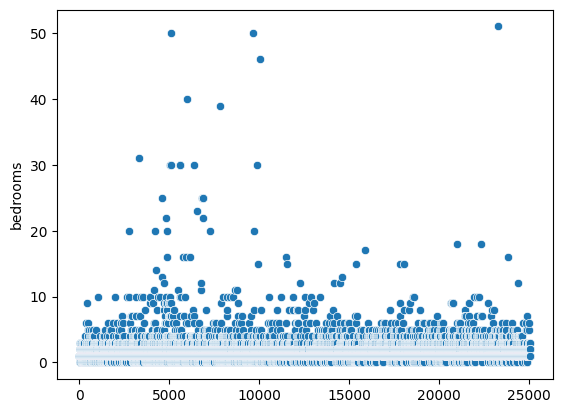

In [177]:
## Step 4-3 . 세부 시설 분석

import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(facility_size['bedrooms'])

<Axes: xlabel='price', ylabel='beds'>

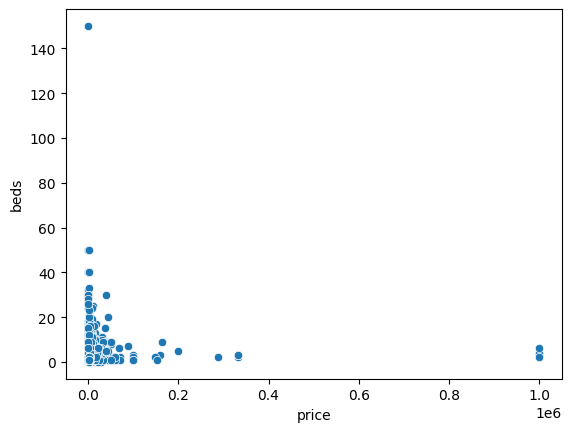

In [178]:
## Step 4-3 . 세부 시설 분석

sns.scatterplot(y = facility_size['beds'], x = facility_size['price'])

In [179]:
## Step 4-3 . 세부 시설 분석

bk_list_all_df['price'] = pd.to_numeric(bk_list_all_df['price'].astype(str).str.replace(',', '').str.replace('$', ''), errors='coerce') # Replacing price column in bk_list_all_df, not in facility_size
pd.pivot_table(bk_list_all_df, index=['room_type'], columns=['bedrooms'], values='price', aggfunc='mean')

bedrooms,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,15.0,16.0,18.0,20.0,30.0,50.0,51.0
room_type,,,,,,,,,,,,,,,,,,,,,
Entire home/apt,1266.539344,1749.379817,3897.776441,4869.347771,6658.789634,13941.910448,13083.142857,21305.541667,12316.333333,27598.066667,...,14597.5,8140.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hotel room,1641.608696,1799.202186,4837.000000,5419.125000,4633.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,389.00,NaN,NaN,2681.0,NaN,NaN
Private room,1450.058252,1924.823335,2903.177340,3909.851351,5408.649123,7378.250000,1360.833333,3223.466667,9534.625000,6025.666667,...,NaN,733.333333,37000.0,700.0,762.75,1011.5,22900.0,NaN,800.0,882.0
Shared room,518.500000,944.979351,1041.250000,NaN,645.500000,NaN,655.000000,NaN,495.000000,495.000000,...,520.0,40000.000000,NaN,NaN,NaN,NaN,490.0,NaN,NaN,NaN


In [180]:
## Step 4-3 . 세부 시설 분석
pd.pivot_table(bk_list_all_df, index=['room_type', 'bedrooms'], columns=['neighbourhood_cleansed'], values='price', aggfunc='median') # Using 'property_type' as index instead of an empty string.

neighbourhood_cleansed    Bang Bon  Bang Kapi  Bang Khae  Bang Khen  \
room_type       bedrooms                                              
Entire home/apt 0.0          583.0      700.0        NaN     1600.0   
                1.0          710.0      785.0      701.0      799.0   
                2.0        16000.0     1089.0     1319.5     1416.5   
                3.0         3600.0     2500.0        NaN     3156.5   
                4.0        15000.0     4451.0     3500.0     3348.0   
                5.0            NaN     9207.5     2000.0     3040.0   
                6.0            NaN     8177.0        NaN     1725.0   
                7.0            NaN        NaN        NaN        NaN   
                8.0            NaN        NaN        NaN        NaN   
                9.0            NaN        NaN        NaN        NaN   
                10.0           NaN        NaN        NaN        NaN   
                11.0           NaN        NaN        NaN        NaN   
                12.0           NaN        NaN        NaN        NaN   
Hotel room      0.0            NaN        NaN        NaN        NaN   
                1.0            NaN      650.0      750.0     1200.0   
                2.0            NaN        NaN        NaN        NaN   
                3.0            NaN        NaN        NaN        NaN   
                4.0            NaN        NaN        NaN        NaN   
                10.0           NaN        NaN        NaN        NaN   
                16.0           NaN        NaN        NaN        NaN   
                30.0           NaN        NaN        NaN        NaN   
Private room    0.0            NaN      550.0        NaN      552.0   
                1.0         1431.0      857.0      626.0      734.0   
                2.0            NaN     1300.0     1250.0     1229.0   
                3.0            NaN     4975.0        NaN        NaN   
                4.0            NaN    10000.0      700.0        NaN   
                5.0            NaN     8084.0        NaN        NaN   
                6.0            NaN        NaN        NaN        NaN   
                7.0            NaN        NaN      990.0        NaN   
                8.0            NaN    20000.0        NaN        NaN   
                9.0            NaN        NaN        NaN        NaN   
                10.0           NaN        NaN        NaN        NaN   
                12.0           NaN        NaN        NaN        NaN   
                16.0           NaN      815.0        NaN        NaN   
                13.0           NaN        NaN        NaN        NaN   
                15.0           NaN      700.0        NaN        NaN   
                18.0           NaN        NaN        NaN        NaN   
                20.0           NaN        NaN        NaN        NaN   
                50.0           NaN        NaN        NaN        NaN   
                51.0           NaN        NaN        NaN        NaN   
Shared room     0.0            NaN        NaN        NaN        NaN   
                1.0            NaN      284.0        NaN      550.0   
                2.0            NaN        NaN        NaN        NaN   
                4.0            NaN        NaN        NaN        NaN   
                6.0            NaN        NaN        NaN        NaN   
                8.0            NaN        NaN        NaN        NaN   
                9.0            NaN        NaN        NaN        NaN   
                10.0           NaN        NaN        NaN        NaN   
                11.0           NaN        NaN        NaN        NaN   
                12.0           NaN        NaN        NaN        NaN   
                20.0           NaN        NaN        NaN        NaN   

neighbourhood_cleansed    Bang Kho laen  Bang Khun thain  Bang Na  Bang Phlat  \
room_type       bedrooms                                                        
Entire home/apt 0.0               730.0              NaN    655.0       60

In [181]:
## Step 5-1 Feature-Engineering (1)

## 1. 각 숙소의 주요 관광지로부터의 거리함수 호출

import math
from geopy.distance import geodesic
import pandas as pd

def get_distance(loc1, loc2):
    return geodesic(loc1, loc2) ## 거리가 km 로 나오게됨

## 2. 주요 관광지 데이터

des1 = (13.7464, 100.4928)
des2 = (13.7998, 100.5504)
des3 = (13.7458, 100.5344)
des4 = (13.7439, 100.4884)
des5 = (13.7499, 100.4916)
des6 = (13.7494, 100.5282)
des7 = (13.4443, 100.3147)
des8 = (13.7516, 100.4927)
des9 = (13.7465, 100.5391)
des10 = (13.7314, 100.5417)

destination = [des1, des2, des3, des4, des5, des6, des7, des8, des9, des10]

## 2. 주요 관광지로부터의 거리

distances = []
for i in range(len(data)): ## DataFrame 에서 위치 정보 행별로 불러오기  # Changed 'data' to 'location'
    total_distance = 0
    for j in range(len(destination)): ## 10개의 주요 관광지 위치 정보 불러오기
        origin = (data.iloc[i]['latitude'], data.iloc[i]['longitude'])
        d = get_distance(origin, destination[j])  ## 거리 구하기
        total_distance += d.km
    distances.append(total_distance)

distance_df = pd.DataFrame(distances, columns=['distance']) ## 거리값으로 구성된 DataFrame 생성
print(distance_df)

         distance
0       77.662901
1      170.271086
2      152.325979
3      114.971198
4      105.900914
...           ...
25074  105.466728
25075  105.466728
25076  105.466728
25077  105.466728
25078  105.466728

[25079 rows x 1 columns]


In [182]:
## Step 5-1 Feature-Engineering (2)
## 인기 어메니티 리스트
popular_amenities = [
    "Pool", "Wifi", "Kitchen", "Free parking on premises",
    "Air conditioning", "Washer", "Self check-in", "TV"
]

# 인기 어메니티 칼럼을 추가
for amenity in popular_amenities:
    # amenities 칼럼에서 해당 어메니티가 포함되어 있으면 True, 없으면 False
    bk_list_all_df[amenity] = bk_list_all_df['amenities'].apply(lambda x: amenity in str(x) if isinstance(x, str) else False)  # Amenities 칼럼이 추가된 Dataframe


amenities_df = bk_list_all_df[popular_amenities] ## Popular amnities 로 구성된 Dataframe 생성

# 생성된 datafram 을 확인
amenities_df

,Pool,Wifi,Kitchen,Free parking on premises,Air conditioning,Washer,Self check-in,TV
0,True,True,True,True,True,True,False,False
1,True,True,True,True,False,True,False,True
2,False,False,False,False,False,False,False,False
3,False,False,True,True,True,False,True,True
4,False,False,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...
25074,True,True,True,True,True,True,True,True
25075,True,True,True,True,True,True,True,True
25076,True,True,True,True,True,True,False,True
25077,True,True,True,True,True,True,False,True


In [183]:
## Step 5-1 Feature-Engineering (3)
##  Feature Engineering Dataset 완성

FE_df = pd.concat([distance_df, amenities_df], axis=1) ## 기존의 DataFrame 에 추가하여 Feature Engineering DataFrame 에 포함시킴
FE_df.head()
FE_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25079 entries, 0 to 25078
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   distance                  25079 non-null  float64
 1   Pool                      25079 non-null  bool   
 2   Wifi                      25079 non-null  bool   
 3   Kitchen                   25079 non-null  bool   
 4   Free parking on premises  25079 non-null  bool   
 5   Air conditioning          25079 non-null  bool   
 6   Washer                    25079 non-null  bool   
 7   Self check-in             25079 non-null  bool   
 8   TV                        25079 non-null  bool   
dtypes: bool(8), float64(1)
memory usage: 392.0 KB


----------------------------------------------------------------------------------------------------------------------------------------------------------------

In [198]:
X_FE

,distance,Pool,Wifi,Kitchen,Free parking on premises,Air conditioning,Washer,Self check-in,TV,bedrooms,...,neighbourhood_cleansed_Taling Chan,neighbourhood_cleansed_Thawi Watthana,neighbourhood_cleansed_Thon buri,neighbourhood_cleansed_Thung khru,neighbourhood_cleansed_Vadhana,neighbourhood_cleansed_Wang Thong Lang,neighbourhood_cleansed_Yan na wa,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,77.662901,True,True,True,True,True,True,False,False,1.0,...,False,False,False,False,False,False,False,False,False,False
3,114.971198,False,False,True,True,True,False,True,True,1.0,...,False,False,False,False,False,False,False,False,True,False
4,105.900914,False,False,True,True,True,False,False,False,1.0,...,False,False,False,False,False,False,False,False,True,False
5,77.853781,False,True,True,True,True,True,True,True,1.0,...,False,False,False,False,False,False,False,False,True,False
6,78.667263,False,True,False,True,True,True,False,True,1.0,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25074,105.466728,True,True,True,True,True,True,True,True,1.0,...,False,False,False,False,False,False,False,False,False,False
25075,105.466728,True,True,True,True,True,True,True,True,1.0,...,False,False,False,False,False,False,False,False,False,False
25076,105.466728,True,True,True,True,True,True,False,True,2.0,...,False,False,False,False,False,False,False,False,False,False
25077,105.466728,True,True,True,True,True,True,False,True,1.0,...,False,False,False,False,False,False,False,False,False,False


In [184]:
## Step 6 데이터 전처리 (Base model)
data = bk_list_all_df

# 관심 열 선택
selected_columns = ['price', 'neighbourhood_cleansed', 'bedrooms', 'room_type', 'amenities']
data = data[selected_columns]

# price 열 정리: 특수 문자 제거 및 숫자로 변환
data['price'] = data['price'].replace('[\$,]', '', regex=True).astype(float)

# 이상치 제거
# price 열: 1% ~ 99% 범위만 유지
lower_bound = data['price'].quantile(0.01)
upper_bound = data['price'].quantile(0.99)
data = data[(data['price'] >= lower_bound) & (data['price'] <= upper_bound)]

# bedrooms 열: 0.0 ~ 10.0 사이 값만 유지
data = data[data['bedrooms'] <= 10]

# amenities 열: 포함된 항목의 개수로 변환
data['amenities_count'] = data['amenities'].str.count(',') + 1
data = data.drop(columns=['amenities'])

# 원-핫 인코딩: neighbourhood_cleansed와 room_type
data = pd.get_dummies(data, columns=['neighbourhood_cleansed', 'room_type'], drop_first=True)

# 결측값 처리
data = data.dropna()

<ipython-input-184-67a6ef6db4d2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price'] = data['price'].replace('[\$,]', '', regex=True).astype(float)


----------------------------------------------------------------------------------------------------------------------------------------------------------------

In [185]:
## Step 7 Base model 실행 (1)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# X (특징)와 y (타겟) 분리
y = data['price']
X = data.drop(columns=['price'])

print(X.info())
print('*'*30)
print(y)

<class 'pandas.core.frame.DataFrame'>
Index: 19653 entries, 0 to 25078
Data columns (total 54 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   bedrooms                                     19653 non-null  float64
 1   amenities_count                              19653 non-null  int64  
 2   neighbourhood_cleansed_Bang Kapi             19653 non-null  bool   
 3   neighbourhood_cleansed_Bang Khae             19653 non-null  bool   
 4   neighbourhood_cleansed_Bang Khen             19653 non-null  bool   
 5   neighbourhood_cleansed_Bang Kho laen         19653 non-null  bool   
 6   neighbourhood_cleansed_Bang Khun thain       19653 non-null  bool   
 7   neighbourhood_cleansed_Bang Na               19653 non-null  bool   
 8   neighbourhood_cleansed_Bang Phlat            19653 non-null  bool   
 9   neighbourhood_cleansed_Bang Rak              19653 non-null  bool   
 10  nei

In [186]:
## Step 7 Base model 실행 (2)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# 상관관계 기반 변수 선택
correlation_threshold = 0.1
correlation = pd.concat([X, y], axis=1).corr()
high_corr_features = correlation.index[abs(correlation['price']) > correlation_threshold].drop('price')
X_filtered = X[high_corr_features]

# 데이터 스케일링
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 데이터 분리: 학습용 및 테스트용
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 학습
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# 모델 평가
y_pred_linear = linear_model.predict(X_test)

# MSE 계산
mse_filtered = mean_squared_error(y_test, y_pred_linear)
print('MSE:', mse_filtered)

# RMSE 계산
rmse = np.sqrt(mse_filtered)
print('RMSE:', rmse)

# MAE 계산
mae = mean_absolute_error(y_test, y_pred_linear)
print('MAE:', mae)

# R-squared 계산
r2 = r2_score(y_test, y_pred_linear)
print('R-squared:', r2)

MSE: 1959257.1562102146
RMSE: 1399.734673504309
MAE: 838.929701388628
R-squared: 0.3278820118396909


In [187]:
## Step 8. Feature engineered model 실행

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 상관관계 기반 변수 선택
correlation_threshold = 0.1
correlation = pd.concat([X_FE, y_FE], axis=1).corr()
high_corr_features = correlation.index[abs(correlation['price']) > correlation_threshold].drop('price')
X_FE_filtered = X_FE[high_corr_features]

# 데이터 스케일링
scaler = MinMaxScaler()
X_FE_scaled = scaler.fit_transform(X_FE)

# 데이터 분리: 학습용 및 테스트용
X_FE_train, X_FE_test, y_FE_train, y_FE_test = train_test_split(X_FE_scaled, y_FE, test_size=0.2, random_state=42)

# 선형 회귀 모델 학습
linear_model = LinearRegression()
linear_model.fit(X_FE_train, y_FE_train)

# 모델 평가
y_FE_pred_linear = linear_model.predict(X_FE_test)

# MSE 계산
mse_filtered = mean_squared_error(y_FE_test, y_FE_pred_linear)
print('MSE:', mse_filtered)

# RMSE 계산
rmse = np.sqrt(mse_filtered)
print('RMSE:', rmse)

# MAE 계산
mae = mean_absolute_error(y_FE_test, y_FE_pred_linear)
print('MAE:', mae)

# R-squared 계산
r2 = r2_score(y_FE_test, y_FE_pred_linear)
print('R-squared:', r2)

MSE: 1873687.9714990752
RMSE: 1368.8272248531132
MAE: 821.9653011041738
R-squared: 0.35723629445352356


In [197]:
## Step 8. Feature engineered model 실행 (Dataset)

X_FE  ## Base model 의 Data Frame 에서 Amenities 변수를 제거 한 후,  FE_df과 contact 한 것임. 해당 실행 코딩이 삭제되어 기록 목적으로 남김

,distance,Pool,Wifi,Kitchen,Free parking on premises,Air conditioning,Washer,Self check-in,TV,bedrooms,...,neighbourhood_cleansed_Taling Chan,neighbourhood_cleansed_Thawi Watthana,neighbourhood_cleansed_Thon buri,neighbourhood_cleansed_Thung khru,neighbourhood_cleansed_Vadhana,neighbourhood_cleansed_Wang Thong Lang,neighbourhood_cleansed_Yan na wa,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,77.662901,True,True,True,True,True,True,False,False,1.0,...,False,False,False,False,False,False,False,False,False,False
3,114.971198,False,False,True,True,True,False,True,True,1.0,...,False,False,False,False,False,False,False,False,True,False
4,105.900914,False,False,True,True,True,False,False,False,1.0,...,False,False,False,False,False,False,False,False,True,False
5,77.853781,False,True,True,True,True,True,True,True,1.0,...,False,False,False,False,False,False,False,False,True,False
6,78.667263,False,True,False,True,True,True,False,True,1.0,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25074,105.466728,True,True,True,True,True,True,True,True,1.0,...,False,False,False,False,False,False,False,False,False,False
25075,105.466728,True,True,True,True,True,True,True,True,1.0,...,False,False,False,False,False,False,False,False,False,False
25076,105.466728,True,True,True,True,True,True,False,True,2.0,...,False,False,False,False,False,False,False,False,False,False
25077,105.466728,True,True,True,True,True,True,False,True,1.0,...,False,False,False,False,False,False,False,False,False,False


In [188]:
## Step 9. 결과분석
## 상관계수 계산

df = pd.DataFrame(data)

correlation_matrix = df.corr()
print(correlation_matrix)

                                                price  bedrooms  \
price                                        1.000000  0.494770   
bedrooms                                     0.494770  1.000000   
amenities_count                              0.113836  0.111708   
neighbourhood_cleansed_Bang Kapi            -0.034172  0.003913   
neighbourhood_cleansed_Bang Khae            -0.026410  0.070943   
neighbourhood_cleansed_Bang Khen            -0.024595  0.014907   
neighbourhood_cleansed_Bang Kho laen        -0.014862  0.002986   
neighbourhood_cleansed_Bang Khun thain       0.000789  0.010931   
neighbourhood_cleansed_Bang Na              -0.053351 -0.031626   
neighbourhood_cleansed_Bang Phlat           -0.068696 -0.014741   
neighbourhood_cleansed_Bang Rak              0.045143  0.015947   
neighbourhood_cleansed_Bang Sue             -0.057051 -0.010099   
neighbourhood_cleansed_Bangkok Noi          -0.027538 -0.009111   
neighbourhood_cleansed_Bangkok Yai           0.008228  0.01920

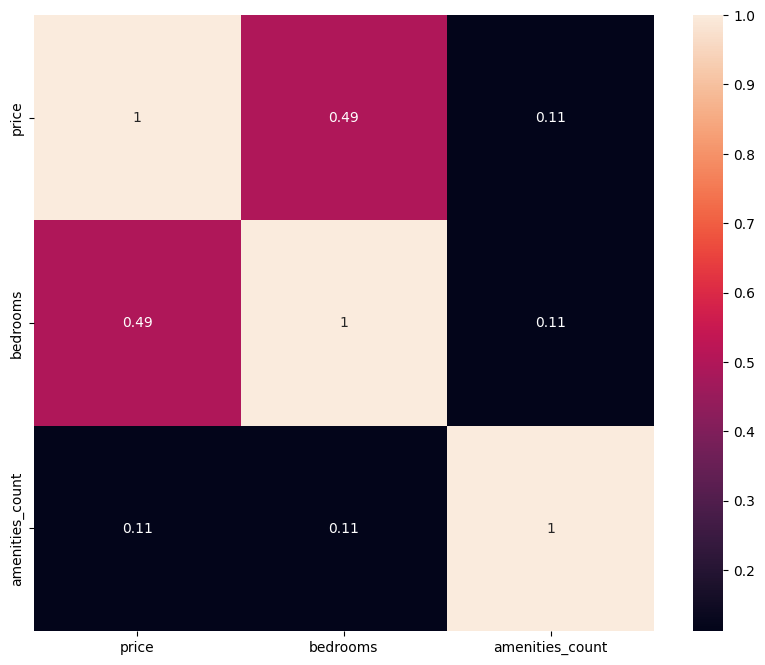

In [189]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming 'data' is your DataFrame
# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=np.number)

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True)  # neatmap -> heatmap
plt.show() # Add this to display the plot